In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install fbprophet pystan
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/animesh/Projects/wind/pythonenv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-3h_eeazv/fbprophet_0df04f1afce6451d96b8b285270d67d9/setup.py'"'"'; __file__='"'"'/tmp/pip-install-3h_eeazv/fbprophet_0df04f1afce6451d96b8b285270d67d9/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-qsltsa3c
       cwd: /tmp/pip-install-3h_eeazv/fbprophet_0df04f1afce6451d96b8b285270d67d9/
  Complete output (39 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Importing plotly failed. Interactive plots will not work.
  Traceback (most recent call last):
    File "<string>", line 

Failed to build fbprophet
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /home/animesh/Projects/wind/pythonenv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-3h_eeazv/fbprophet_0df04f1afce6451d96b8b285270d67d9/setup.py'"'"'; __file__='"'"'/tmp/pip-install-3h_eeazv/fbprophet_0df04f1afce6451d96b8b285270d67d9/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-p4d8eg5_/install-record.txt --single-version-externally-managed --compile --install-headers /home/animesh/Projects/wind/pythonenv/include/site/python3.8/fbprophet
         cwd: /tmp/pip-install-3h_eeazv/fbprophet_0df04f1afce6451d96b8b285270d67d9/
    Complete output (41 lines):
    running install
    running build
    running build_py
    creating build
    creating bu

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
df = pd.read_csv("../input/30-year-data/TS.CF.N2.30yr.csv")
df.columns

Index(['PL41', 'ES21', 'PL32', 'UKK1', 'PL34', 'ES24', 'CZ06', 'UKM6', 'CZ03',
       'ES41',
       ...
       'Dec-00', 'ITF1', 'DE72', 'FR43', 'ITI4', 'NL13', 'DE26', 'FR26',
       'DEB1', 'FR51'],
      dtype='object', length=255)

In [3]:
df_PL41 = df["PL41"]
df_PL41 = df_PL41.to_frame()

In [4]:
dti = pd.date_range("01-01-1986", periods=262968, freq="H")

In [5]:
df_PL41["Timestamp"] = dti

In [9]:
df_PL41 = df_PL41[["Timestamp","PL41"]]

In [13]:
df_PL41 = df_PL41.rename(columns = {"Timestamp":"ds","PL41":"y"})

In [14]:
m = Prophet()
m.fit(df_PL41)

In [22]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('prophet_PL41.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [15]:
future = m.make_future_dataframe(periods=1440)
future.tail()

,ds
264403,2019-12-06 23:00:00
264404,2019-12-07 23:00:00
264405,2019-12-08 23:00:00
264406,2019-12-09 23:00:00
264407,2019-12-10 23:00:00


In [16]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
264403,2019-12-06 23:00:00,0.295627,-0.047283,0.665629
264404,2019-12-07 23:00:00,0.299751,-0.051310,0.644507
264405,2019-12-08 23:00:00,0.299145,-0.041954,0.654970
264406,2019-12-09 23:00:00,0.309058,-0.028035,0.659564
264407,2019-12-10 23:00:00,0.314676,-0.039548,0.683825


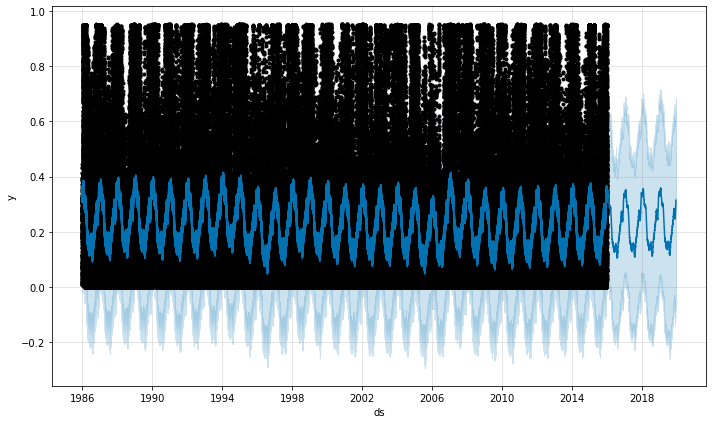

In [53]:
fig1 = m.plot(forecast)
pylab.savefig('Prophet_Results3.png')

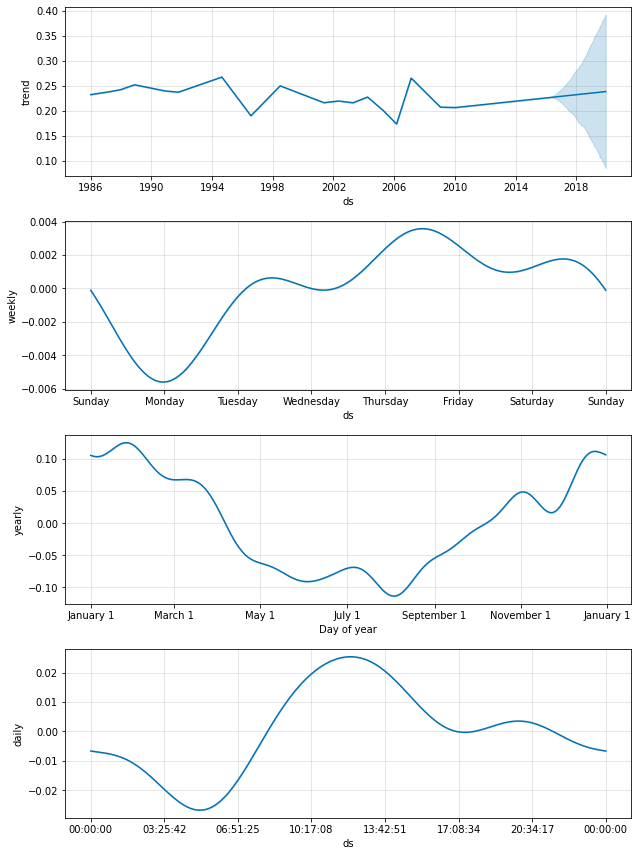

In [52]:
fig2 = m.plot_components(forecast)
pylab.savefig('Prophet_Results1.png')

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-01-01 00:00:00,0.233047,-0.001381,0.654955,0.233047,0.233047,0.099526,0.099526,0.099526,-0.006616,...,-0.000002,-0.000002,-0.000002,0.106144,0.106144,0.106144,0.0,0.0,0.0,0.332572
1,1986-01-01 01:00:00,0.233047,0.026258,0.635283,0.233047,0.233047,0.098257,0.098257,0.098257,-0.007810,...,-0.000043,-0.000043,-0.000043,0.106110,0.106110,0.106110,0.0,0.0,0.0,0.331304
2,1986-01-01 02:00:00,0.233048,0.037590,0.631341,0.233048,0.233048,0.095137,0.095137,0.095137,-0.010865,...,-0.000073,-0.000073,-0.000073,0.106076,0.106076,0.106076,0.0,0.0,0.0,0.328185
3,1986-01-01 03:00:00,0.233048,0.024003,0.636718,0.233048,0.233048,0.089258,0.089258,0.089258,-0.016693,...,-0.000092,-0.000092,-0.000092,0.106042,0.106042,0.106042,0.0,0.0,0.0,0.322306
4,1986-01-01 04:00:00,0.233049,0.005112,0.642365,0.233049,0.233049,0.082650,0.082650,0.082650,-0.023261,...,-0.000098,-0.000098,-0.000098,0.106008,0.106008,0.106008,0.0,0.0,0.0,0.315698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264403,2019-12-06 23:00:00,0.239090,-0.047283,0.665629,0.087159,0.392265,0.056537,0.056537,0.056537,-0.004969,...,0.001198,0.001198,0.001198,0.060307,0.060307,0.060307,0.0,0.0,0.0,0.295627
264404,2019-12-07 23:00:00,0.239099,-0.051310,0.644507,0.086987,0.392473,0.060652,0.060652,0.060652,-0.004969,...,0.000154,0.000154,0.000154,0.065466,0.065466,0.065466,0.0,0.0,0.0,0.299751
264405,2019-12-08 23:00:00,0.239108,-0.041954,0.654970,0.086815,0.392674,0.060038,0.060038,0.060038,-0.004969,...,-0.005584,-0.005584,-0.005584,0.070590,0.070590,0.070590,0.0,0.0,0.0,0.299145
264406,2019-12-09 23:00:00,0.239117,-0.028035,0.659564,0.086643,0.392807,0.069942,0.069942,0.069942,-0.004969,...,-0.000702,-0.000702,-0.000702,0.075612,0.075612,0.075612,0.0,0.0,0.0,0.309058


In [24]:
output_prophet = forecast[["ds","yhat"]]

In [25]:
output_prophet.to_csv("Prophet_Model_PL41.csv")

In [26]:
df_PL41.to_csv("PL41_data.csv")

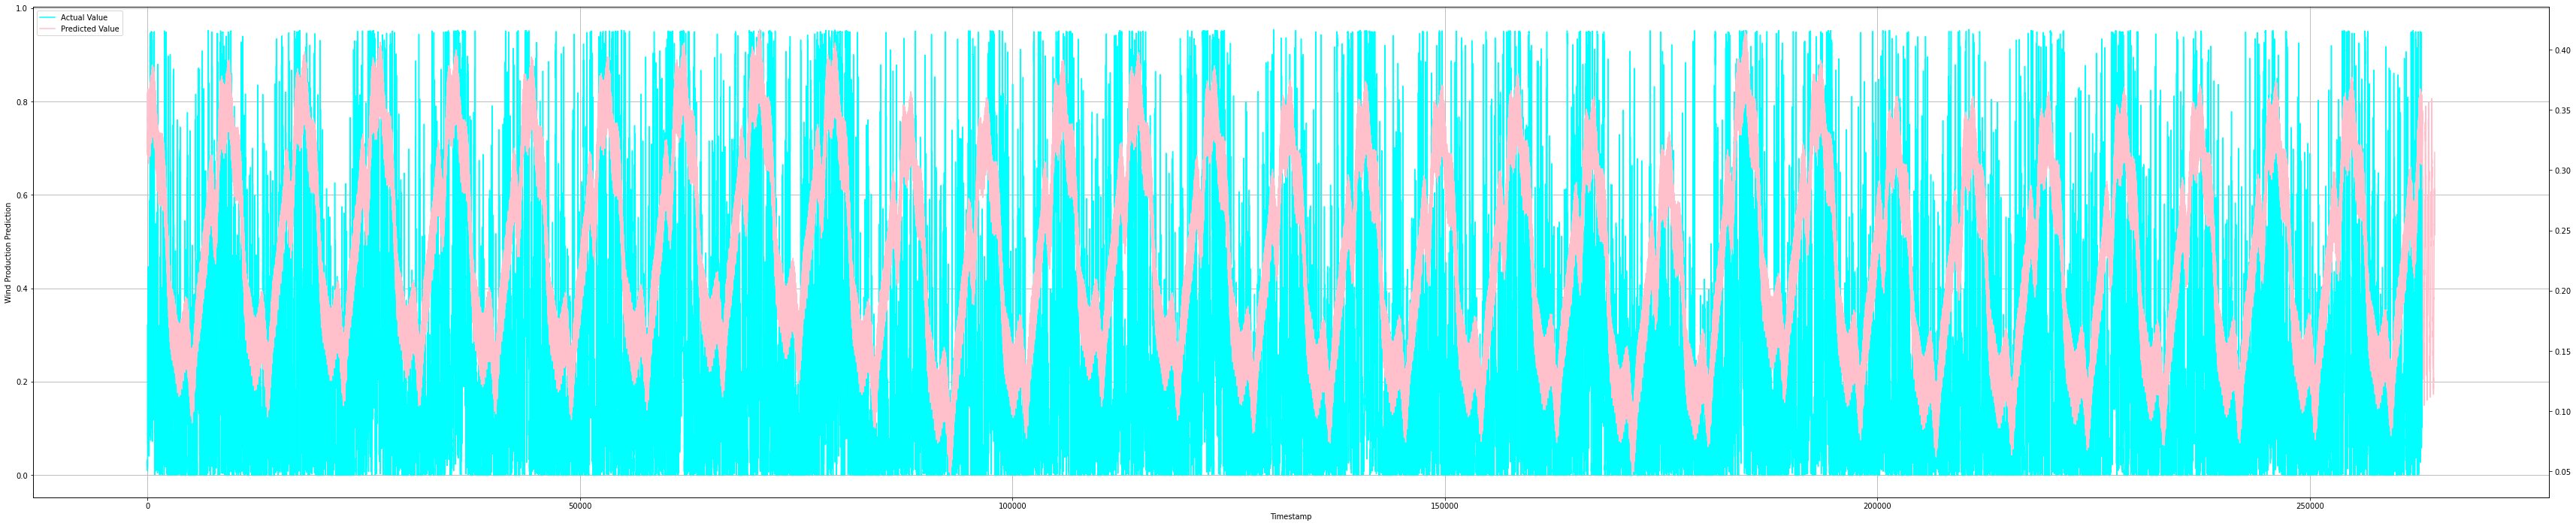

In [51]:
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
plt.figure(figsize=(60,12))
plt.ylabel('Wind Production Prediction')
plt.xlabel('Timestamp')

ax1 = df_PL41.y.plot(color='cyan', grid=True, label='Actual Value')
ax2 = output_prophet.yhat.plot(color='pink', grid=True, secondary_y=True, label='Predicted Value')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
pylab.savefig('Prophet_Results.png')
plt.show()
